# K-Nearest-Neighbors
KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting 
of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a
function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

# Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

# Problem statement

Dataset:
The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald 
Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). 
Four features were measured from each sample: the length and the width of the sepals and petals.

Source: https://archive.ics.uci.edu/ml/datasets/Iris

Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.

# Question 1
Import libraries and load the dataset

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import cross_validate
import pandas as pd

In [3]:
#Data setup
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Shape**

In [4]:
df.shape

(152, 6)

In [5]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             152 non-null    int64  
 1   SepalLengthCm  151 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   151 non-null    float64
 5   Species        152 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Data Pre-processing

# Question 2 - Imputing missing values
Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (mean or median).

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [8]:
df.boxplot(vert=0)

In [9]:
df["SepalLengthCm"].fillna(df["SepalLengthCm"].mean(),inplace=True) # No Outliers so imputed the null value with mean
df["PetalLengthCm"].fillna(df["PetalLengthCm"].mean(),inplace=True) # No Outliers so imputed the null value with mean
df["PetalWidthCm"].fillna(df["PetalWidthCm"].mean(),inplace=True) # No Outliers so imputed the null value with mean
df["SepalWidthCm"].fillna(df["SepalWidthCm"].median(),inplace=True) # Outliers are present so imputed the null value with median

In [10]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Question 3 - Dealing with categorical data
Change all the classes to numericals (0to2) with the help of **pd.Categorical().codes** and drop ID as it is insignificant and does not contain any information

In [11]:
df["Species"].value_counts()

Iris-virginica     52
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [12]:
df["Species"]=pd.Categorical(df["Species"]).codes

In [13]:
df["Species"].value_counts()

2    52
1    50
0    50
Name: Species, dtype: int64

In [14]:
df.drop("Id",axis=1,inplace=True)

# Question 4
Observe the association of each independent variable with target variable by checking the .corr() and make a heatmap/correlation plot

In [15]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109413,0.871741,0.816256,0.775490
SepalWidthCm,-0.109413,1.000000,-0.420473,-0.356425,-0.417318
PetalLengthCm,0.871741,-0.420473,1.000000,0.960771,0.939813
PetalWidthCm,0.816256,-0.356425,0.960771,1.000000,0.951545
Species,0.775490,-0.417318,0.939813,0.951545,1.000000


**Heatmap**

<IPython.core.display.Javascript object>

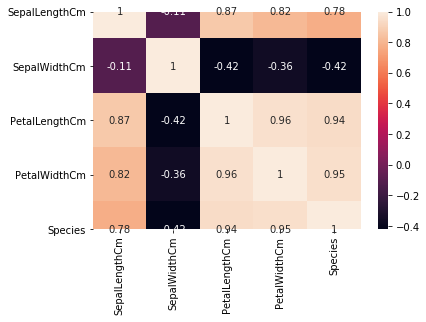

In [16]:
sns.heatmap(df.corr(),annot=True)

# Question 5
Observe the independent variables variance and check for variables having no variance or almost zero variance(variance < 0.1). 
They will be having almost no influence on the classification.

In [17]:
df.var()

SepalLengthCm    0.676633
SepalWidthCm     0.185552
PetalLengthCm    3.071945
PetalWidthCm     0.577079
Species          0.675322
dtype: float64

# Question 6
Plot the pairplot with hue="Species for the data.

<IPython.core.display.Javascript object>

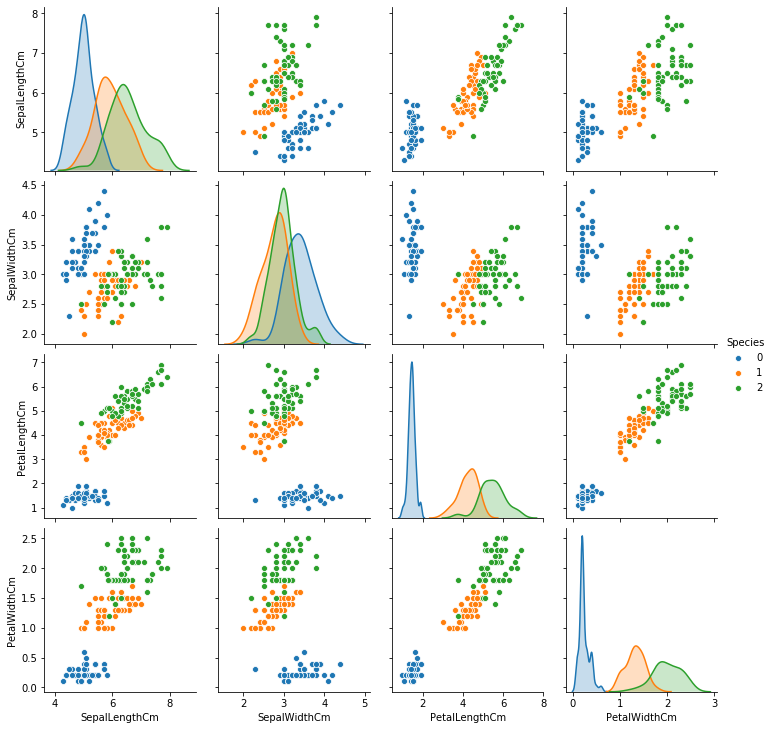

In [18]:
sns.pairplot(df,hue="Species")

# Split the dataset into training and test sets

# Question 7
Split the dataset into training and test sets with 70-30 ratio.

In [19]:
# Arrange data into independent variables and dependent variables
X = df.drop("Species",axis=1)  ## Features
y = df["Species"]  ## Target

In [20]:

# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80 , random_state=20)

# Question 8 - Model
Build the model. Print the Accuracy of the model with different values of k=3,5,9.

Hint: For accuracy use model.score()

In [21]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

# initiantiate learning model (k = 3)
KNN_model=KNeighborsClassifier(n_neighbors = 3,metric='euclidean')

# fitting the model
KNN_model.fit(X_train,y_train)

# predict the response
y_test_predict = KNN_model.predict(X_test)

# evaluate accuracy
print("Accuracy Score for K=3 is ", KNN_model.score(X_test, y_test))

# initiantiate learning model (k = 5)
KNN_model=KNeighborsClassifier(n_neighbors = 5,metric='euclidean')

# fitting the model
KNN_model.fit(X_train,y_train)

# predict the response
y_test_predict = KNN_model.predict(X_test)

# evaluate accuracy
print("Accuracy Score for K=5 is ", KNN_model.score(X_test, y_test))

# initiantiate learning model (k = 9)
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier(n_neighbors = 9,metric='euclidean')

# fitting the model
KNN_model.fit(X_train,y_train)

# predict the response
y_test_predict = KNN_model.predict(X_test)

# evaluate accuracy
print("Accuracy Score for K=9 is ", KNN_model.score(X_test, y_test))

Accuracy Score for K=3 is  0.9590163934426229
Accuracy Score for K=5 is  0.9262295081967213
Accuracy Score for K=9 is  0.9344262295081968


# Question 9 - Optimal no. of K
Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from the above list using the Mis classification error

Hint:

Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the 
model with lowest MCE

In [25]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE


[0.08196721311475408,
 0.040983606557377095,
 0.07377049180327866,
 0.07377049180327866,
 0.06557377049180324,
 0.0901639344262295,
 0.33606557377049184,
 0.34426229508196726,
 0.35245901639344257,
 0.360655737704918]

# Question 10
Plot misclassification error vs k (with k value on X-axis) using matplotlib.

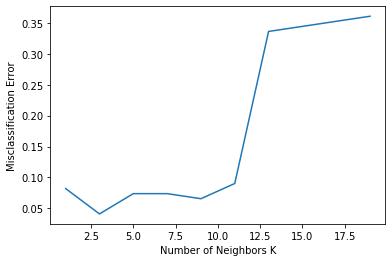

In [23]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

At K=3